In [1]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_state_city as plt
from qiskit.visualization import plot_histogram 
%matplotlib inline

***Circuit to Measure $\hat{J}^2_{+} +\hat{J}^2_{-}$***

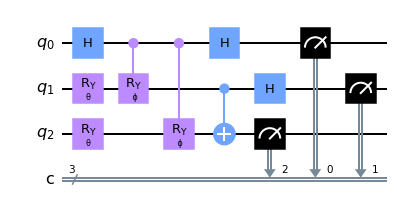

In [2]:
from qiskit.circuit import Parameter

theta, phi = Parameter('θ'), Parameter(' ϕ') 

qc = QuantumCircuit(3,3)

qc.h(0)
qc.ry(theta, 1)
qc.cry(phi, 0, 1)
qc.ry(theta,2)
qc.cry(phi, 0, 2)
qc.cx(1, 2)
qc.h(0)
qc.h(1)

qc.measure(0, 0)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

In [3]:
thetas = np.linspace(0,2*np.pi,128)

phis = np.linspace(0,2*np.pi,128)


In [4]:
def lipkin(theta,phi,shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    
    qc = QuantumCircuit(3,3)

    qc.h(0)
    qc.ry(theta, 1)
    qc.cry(phi, 0, 1)
    qc.ry(theta,2)
    qc.cry(phi, 0, 2)
    qc.cx(1, 2)
    qc.h(0)
    qc.h(1)

    qc.measure(0, 0)
    qc.measure(1,1)
    qc.measure(2,2)
    
    job = execute(qc, backend, shots = shots)
    results = job.result()
    counts = results.get_counts(qc)
    if '000' not in counts:
        counts['000'] = 0 
    if '010' not in counts:
        counts['010'] = 0 
    if '001' not in counts:
        counts['001'] = 0 
    if '100' not in counts:
        counts['100'] = 0 
    if '110' not in counts:
        counts['110'] = 0 
    if '101' not in counts:
        xCounts['101'] = 0 
    if '011' not in counts:
        counts['011'] = 0 
    if '111' not in counts:
        counts['111'] = 0 
    
    
    return counts

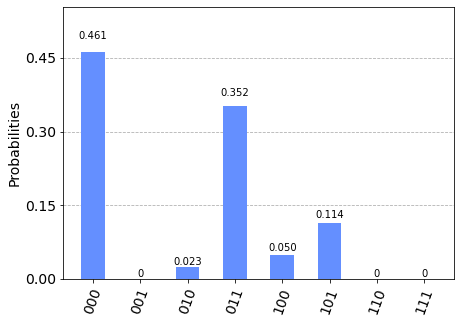

In [5]:
shots = 1024
test = lipkin(1.0,2.3,shots=1024)
plot_histogram(test)


$$p_{123}(000)-p_{123}(011) = \frac{1}{4} \left( \langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta\rangle + \langle\theta+\phi|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle+2\langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle  \right)$$

In [6]:
expectationval = test['000']/shots -test['011']/shots
print(expectationval)

0.109375


$$p_{123}(000)-p_{123}(011)-p_{123}(100)+p_{123}(111) =\langle\theta|\hat{J}^2_{+} +\hat{J}^2_{-}|
\theta+\phi\rangle  $$

In [7]:
expectationval2 = test['000']/shots -test['011']/shots - test['100']/shots +test['111']/shots
print(expectationval2)

0.0595703125
